# MARKETING EFFECTIVENESS - GRUPO 1

## Importación de las librerías

In [1]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Evaluation
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.grid_search import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

%matplotlib inline

c:\users\alfredo\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\alfredo\appdata\local\programs\python\python35\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Carga de datos 

In [2]:
df_sample_submission=pd.read_csv('./sample_submission.csv')
df_test_novel=pd.read_csv('test_nolabel.csv')
df_train=pd.read_csv('train.csv')

## Preprocesado de datos

In [3]:
df_train.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df_test_novel.columns.values.tolist()

['id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [5]:
df_test_novel['job'] = pd.get_dummies(df_test_novel['job'])
df_train['job'] = pd.get_dummies(df_train['job'])

df_test_novel['marital'] = pd.get_dummies(df_test_novel['marital'])
df_train['marital'] = pd.get_dummies(df_train['marital'])

df_test_novel['education'] = pd.get_dummies(df_test_novel['education'])
df_train['education'] = pd.get_dummies(df_train['education'])

df_test_novel['default'] = pd.get_dummies(df_test_novel['default'])
df_train['default'] = pd.get_dummies(df_train['default'])

df_test_novel['housing'] = pd.get_dummies(df_test_novel['housing'])
df_train['housing'] = pd.get_dummies(df_train['housing'])

df_test_novel['loan'] = pd.get_dummies(df_test_novel['loan'])
df_train['loan'] = pd.get_dummies(df_train['loan'])

df_test_novel['contact'] = pd.get_dummies(df_test_novel['contact'])
df_train['contact'] = pd.get_dummies(df_train['contact'])

df_test_novel['month'] = pd.get_dummies(df_test_novel['month'])
df_train['month'] = pd.get_dummies(df_train['month'])

df_test_novel['day_of_week'] = pd.get_dummies(df_test_novel['day_of_week'])
df_train['day_of_week'] = pd.get_dummies(df_train['day_of_week'])

df_test_novel['poutcome'] = pd.get_dummies(df_test_novel['poutcome'])
df_train['poutcome'] = pd.get_dummies(df_train['poutcome'])

In [6]:
df_test_novel.columns.values.tolist()

['id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [7]:
features=[#'id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']
X=df_train[features].values
y=df_train['y'].values

c:\users\alfredo\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


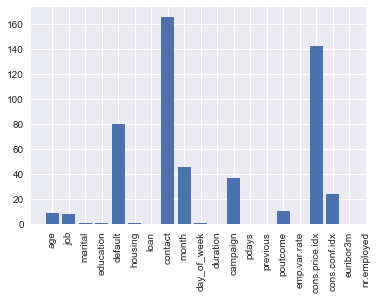

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
kbest=SelectKBest(f_classif,k=6)
kbest.fit(df_train[features].values, df_train['y'].values)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(kbest.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(features)), scores)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()
X = kbest.transform(df_train[features].values)
df_test_novel_transformed = kbest.transform(df_test_novel[features].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Realizar predicción para Kaggle

In [ ]:
#Realizar prediccion
model.fit(X,y)
predicted = model.predict(df_test_novel_transformed)
output = pd.DataFrame( data={"id":df_test_novel.id, "y":predicted} )
output_order = ['id','y']
output[output_order].to_csv('Labels.csv', index=False, quoting=3)